In [19]:
# Import the dependencies.
import os  ## needed to change dir to import keys from different folder
import requests  ## needed for web crawls 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import time

In [20]:

## Import the OpenWeatherMap API key
from c import weather_api_key


In [21]:

from c import weather_api_key

# Get current path using getcwd() 
cwd = os.getcwd() 
print("Current working directory is:", cwd)

Current working directory is: c:\Users\Kelvin\source\repos\WeatherPy


In [22]:
#  randomizing latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) 
lat_lngs 

In [23]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [24]:
# Create a list for holding the cities.
cities = [] 
for coordinate in coordinates:  
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    try:
    
        if city not in cities:
            cities.append(city)
    except(IndexError):
        print("skipping........")    
len(cities)

584

In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f5b2dd7655dd5646fb3641cc9487dc60"

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f5b2dd7655dd5646fb3641cc9487dc60


In [27]:
# start with an empty list for weather data
city_data=[]  
print("Beginning Data Retrieval     ")
print("-----------------------------")


record_count = 1  
set_count = 1  

Beginning Data Retrieval     
-----------------------------


In [28]:
# Loop through all the cities in the list.
for i, city in enumerate(cities): 

    
    if (i % 50 == 0 and i >= 50): 
        set_count += 1  
        record_count = 1 
    
    city_url = url + "&q=" + city

    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    except:
        print("City not found. Skipping...")
        pass  


print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(city_data)

Processing Record 1 of Set 1 | praia da vitoria
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | sabang
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | paragominas
Processing Record 6 of Set 1 | sierra vista
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | kingston
Processing Record 10 of Set 1 | enriquillo
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | karratha
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | turinskaya sloboda
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | levuka
Processing Record 18 of Set 1 | imbituba
Processing Record 19 of Set 1 | idri
Processing Record 20 of Set 1 | qapqal
City not found. Skipping...
Processing Record 21 of Set 1 | deir ez-zor
Processing Record 22 of Set 1 | muisne
Processing Record 23 of Set 1

In [29]:
#count the number of records
len(city_data)  

563

In [30]:

city_data_df=pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Praia Da Vitoria,38.7333,-27.0667,77.25,78,40,12.17,PT,2023-08-03 17:50:13
1,Port-Aux-Francais,-49.3500,70.2167,36.16,87,95,40.11,TF,2023-08-03 17:50:13
2,Sabang,5.8933,95.3214,83.26,77,99,19.22,ID,2023-08-03 17:50:14
3,Cidreira,-30.1811,-50.2056,64.74,78,84,9.04,BR,2023-08-03 17:50:14
4,Paragominas,-2.9667,-47.4833,96.93,29,13,3.62,BR,2023-08-03 17:47:12


In [31]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        563 non-null    object 
 1   Lat         563 non-null    float64
 2   Lng         563 non-null    float64
 3   Max Temp    563 non-null    float64
 4   Humidity    563 non-null    int64  
 5   Cloudiness  563 non-null    int64  
 6   Wind Speed  563 non-null    float64
 7   Country     563 non-null    object 
 8   Date        563 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.7+ KB


In [32]:

new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Praia Da Vitoria,PT,2023-08-03 17:50:13,38.7333,-27.0667,77.25,78,40,12.17
1,Port-Aux-Francais,TF,2023-08-03 17:50:13,-49.3500,70.2167,36.16,87,95,40.11
2,Sabang,ID,2023-08-03 17:50:14,5.8933,95.3214,83.26,77,99,19.22
3,Cidreira,BR,2023-08-03 17:50:14,-30.1811,-50.2056,64.74,78,84,9.04
4,Paragominas,BR,2023-08-03 17:47:12,-2.9667,-47.4833,96.93,29,13,3.62


In [ ]:
city_data_df.head()

In [36]:

output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:

import time

today = time.strftime("%x")
today

'08/04/23'

In [ ]:
#Plot Latitude vs Temperature

In [38]:
#  Create fields needed for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

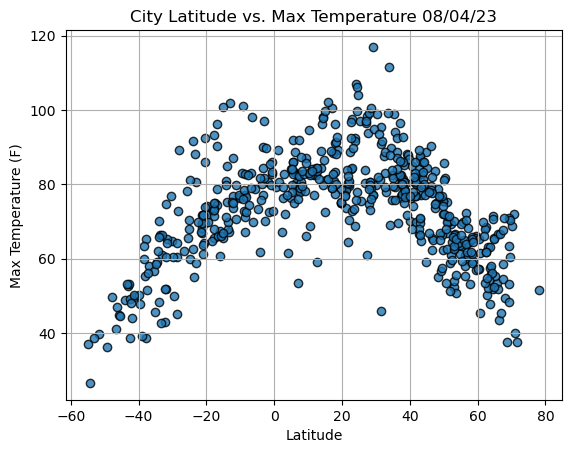

In [39]:
# Scatter plot for latitude vs. max temperature.
plt.scatter(lats,  
            max_temps,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities") 

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("weather_data/Fig1.png")


plt.show()

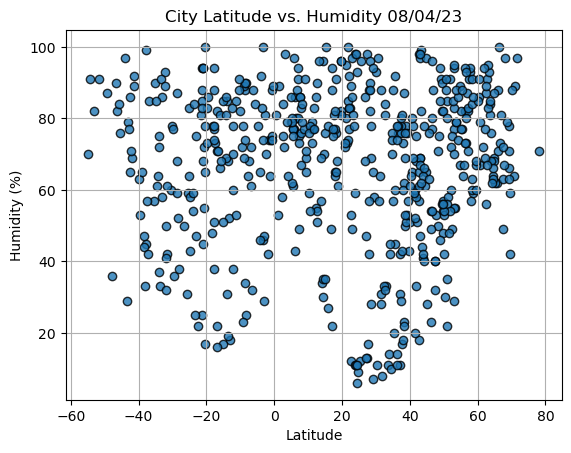

In [40]:
# Scatter plot for latitude vs. Humidity. 
plt.scatter(lats,  
            humidity,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities") 


plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("weather_data/Fig2.png")


plt.show()

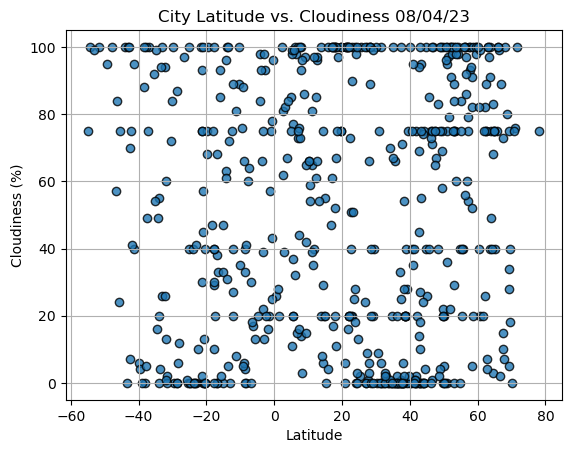

In [41]:
# Scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,  
            cloudiness,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities") 


plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("weather_data/Fig3.png")


plt.show()

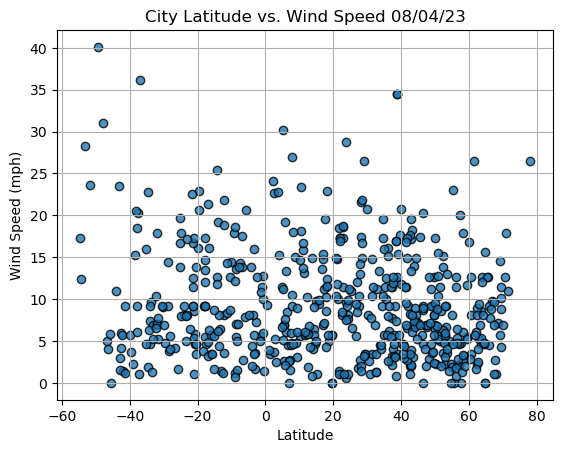

In [42]:
# Scatter plot for latitude vs. Wind Speed. 
plt.scatter(lats,  
            wind_speed,  
            edgecolor="black", linewidths=1, marker="o",  
            alpha=0.8, label="Cities") 


plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("weather_data/Fig4.png")



from scipy.stats import linregress
plt.show()

In [43]:
#Create a linear regression function
from scipy.stats import linregress

In [44]:
# Create a function to create perform linear regression on the weather data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [45]:
## Create Hemispheric DataFrames 


index13=city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2023-08-03 17:50:20
Lat                        62.456
Lng                     -114.3525
Max Temp                    68.52
Humidity                       56
Cloudiness                     75
Wind Speed                    2.3
Name: 13, dtype: object

In [46]:


city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4      False
       ...  
558     True
559     True
560     True
561     True
562    False
Name: Lat, Length: 563, dtype: bool

In [47]:
#create dataframes for northern and southern latitudes

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


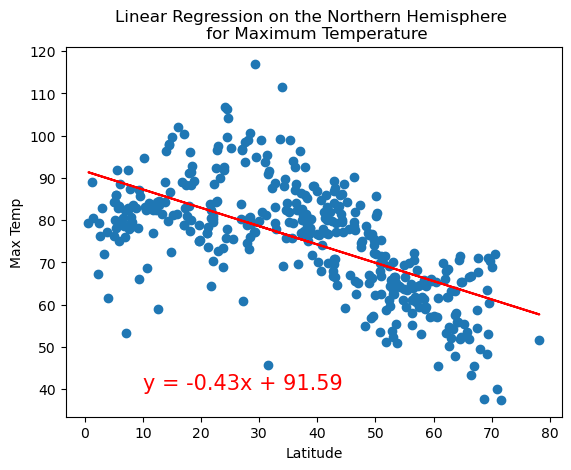

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

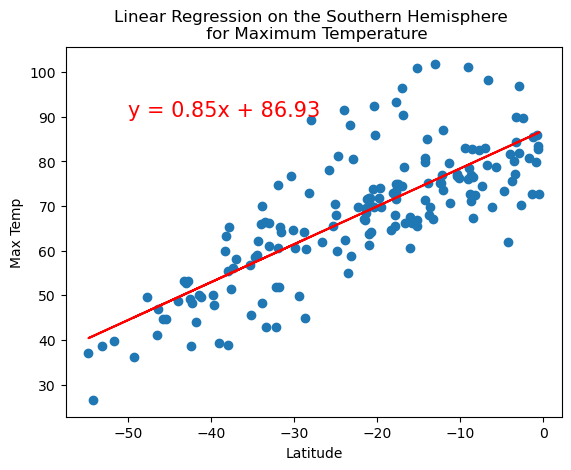

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

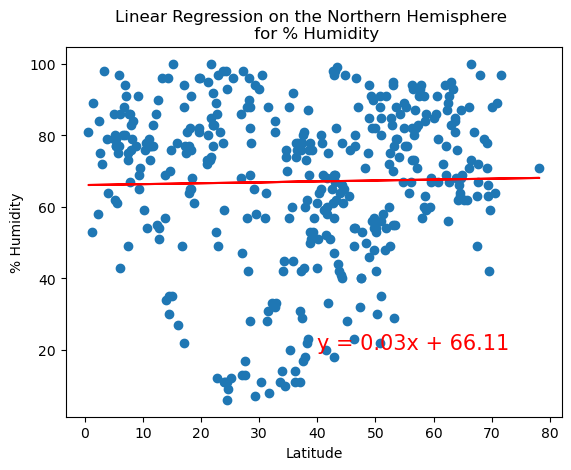

In [50]:
# Linear Regression on the Percent Humidity for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

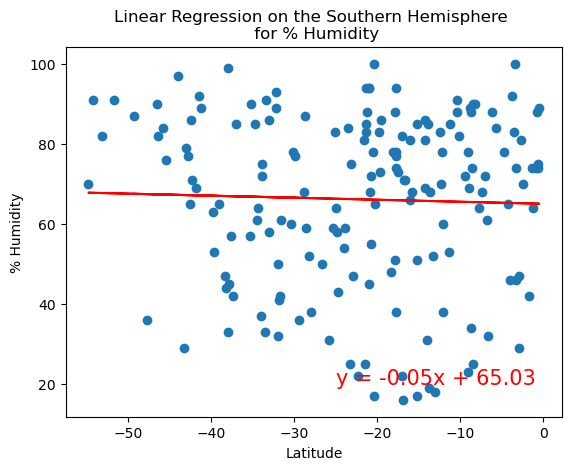

In [51]:
# Linear Regression on the Percent Humidity for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))

In [ ]:

northern_hemi_df.head()

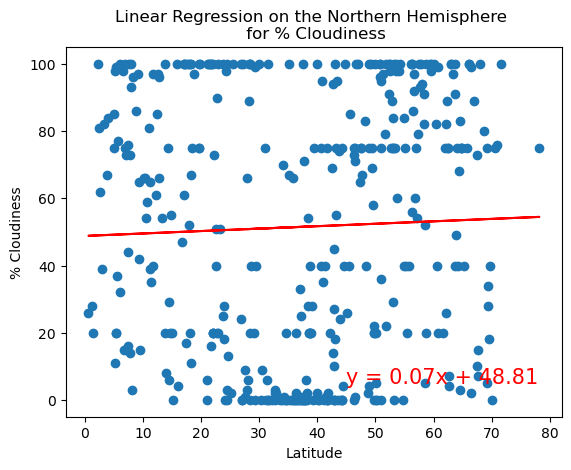

In [52]:
#Linear Regression on the Percent Cloudines for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))

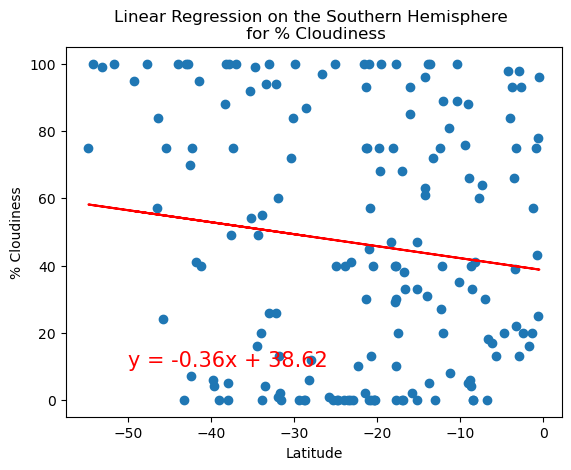

In [53]:
#Linear Regression on the Percent Cloudines for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

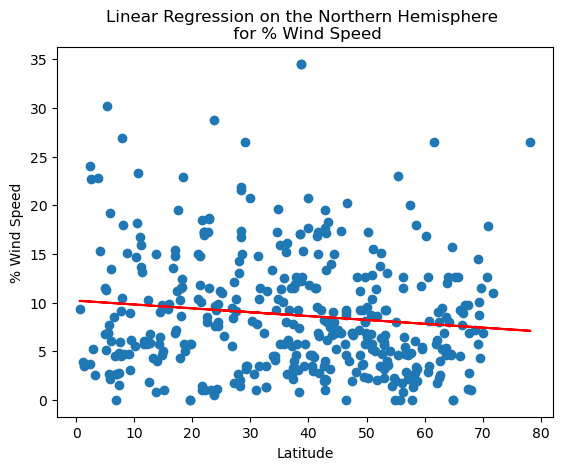

In [54]:
#Linear Regression on  Wind Speed for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

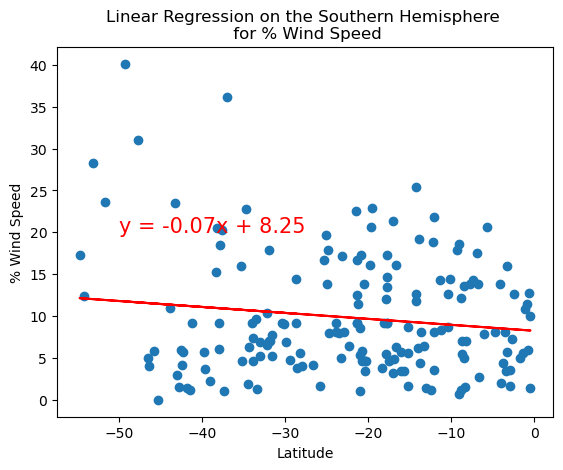

In [55]:
#Linear Regression on  Wind Speed for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))